In [1]:
cd '/Users/rabarry/Documents/Insight/NYC data'

/Users/rabarry/Documents/Insight/NYC data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
import swifter

In [3]:
Data = pd.read_csv('HD_InspCounts_Full.csv')

In [4]:
Data.head(n=2)

,Unnamed: 0,CAMIS,Second_Last_Insp_Type,Second_Last_Insp_Date,Second_Last_Insp_Num_CriticialFlags,Last_Insp_Type,Last_Insp_Date,Last_Insp_Num_CriticialFlags,Insp_Date_Diff,DBA,...,ZIPCODE,CUISINE DESCRIPTION,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,0,30075445,Initial,2019-10-21,2.0,Re-inspection,2019-11-04,1,14 days 00:00:00.000000000,MORRIS PARK BAKE SHOP,...,10462.0,Bakery,40.848231,-73.855972,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37
1,1,30112340,Initial,2018-03-13,1.0,Initial,2019-03-04,1,356 days 00:00:00.000000000,WENDY'S,...,11225.0,Hamburgers,40.662652,-73.962081,309.0,40.0,32700.0,3029737.0,3.011970e+09,BK60


In [5]:
Data.describe()
Data["Second_Last_Insp_Date"] = pd.to_datetime(Data["Second_Last_Insp_Date"])
Data["Last_Insp_Date"] = pd.to_datetime(Data["Last_Insp_Date"])
Data['Insp_Date_Diff'] = Data["Last_Insp_Date"] - Data["Second_Last_Insp_Date"]
Data.dtypes

,Unnamed: 0,CAMIS,Second_Last_Insp_Num_CriticialFlags,Last_Insp_Num_CriticialFlags,ZIPCODE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,25697.000000,2.569700e+04,23794.000000,25697.000000,25298.000000,25647.000000,25647.000000,25248.000000,25248.000000,25248.000000,2.511400e+04,2.564700e+04
mean,32896.849905,4.657979e+07,1.556359,1.270382,10672.241837,40.094740,-72.793501,248.336819,19.914686,28976.979800,2.506026e+06,2.391907e+09
std,19211.503343,4.334922e+06,1.265577,1.018764,596.440637,5.040893,9.151426,131.959125,15.828897,30943.126441,1.357688e+06,1.352866e+09
min,0.000000,3.007544e+07,0.000000,0.000000,10000.000000,0.000000,-74.248434,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00
25%,16192.000000,4.145745e+07,1.000000,1.000000,10022.000000,40.686058,-73.989324,105.000000,4.000000,7900.000000,1.042399e+06,1.010320e+09
50%,32712.000000,5.001812e+07,1.000000,1.000000,10467.000000,40.732767,-73.959469,301.000000,19.000000,15900.000000,3.003576e+06,3.000550e+09
75%,49405.000000,5.007118e+07,2.000000,2.000000,11229.000000,40.761801,-73.899346,401.000000,34.000000,40500.000000,4.000255e+06,4.001625e+09
max,67088.000000,5.010240e+07,10.000000,10.000000,12345.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09


Unnamed: 0                                       int64
CAMIS                                            int64
Second_Last_Insp_Type                           object
Second_Last_Insp_Date                   datetime64[ns]
Second_Last_Insp_Num_CriticialFlags            float64
Last_Insp_Type                                  object
Last_Insp_Date                          datetime64[ns]
Last_Insp_Num_CriticialFlags                     int64
Insp_Date_Diff                         timedelta64[ns]
DBA                                             object
BORO                                            object
ZIPCODE                                        float64
CUISINE DESCRIPTION                             object
Latitude                                       float64
Longitude                                      float64
Community Board                                float64
Council District                               float64
Census Tract                                   float64
BIN       

In [32]:
Data_subset = Data[Data.Second_Last_Insp_Type.notnull()]

In [36]:
Data_subset['Insp_Date_Diff_Int'] = Data_subset['Insp_Date_Diff'].dt.days
Data_subset.head(n=2)

/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,CAMIS,Second_Last_Insp_Type,Second_Last_Insp_Date,Second_Last_Insp_Num_CriticialFlags,Last_Insp_Type,Last_Insp_Date,Last_Insp_Num_CriticialFlags,Insp_Date_Diff,DBA,...,CUISINE DESCRIPTION,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Insp_Date_Diff_Int
0,0,30075445,Initial,2019-10-21,2.0,Re-inspection,2019-11-04,1,14 days,MORRIS PARK BAKE SHOP,...,Bakery,40.848231,-73.855972,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37,14
1,1,30112340,Initial,2018-03-13,1.0,Initial,2019-03-04,1,356 days,WENDY'S,...,Hamburgers,40.662652,-73.962081,309.0,40.0,32700.0,3029737.0,3.011970e+09,BK60,356


In [37]:
Data_subset.dtypes

Unnamed: 0                                       int64
CAMIS                                            int64
Second_Last_Insp_Type                           object
Second_Last_Insp_Date                   datetime64[ns]
Second_Last_Insp_Num_CriticialFlags            float64
Last_Insp_Type                                  object
Last_Insp_Date                          datetime64[ns]
Last_Insp_Num_CriticialFlags                     int64
Insp_Date_Diff                         timedelta64[ns]
DBA                                             object
BORO                                            object
ZIPCODE                                        float64
CUISINE DESCRIPTION                             object
Latitude                                       float64
Longitude                                      float64
Community Board                                float64
Council District                               float64
Census Tract                                   float64
BIN       

In [7]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [8]:
from sklearn import preprocessing

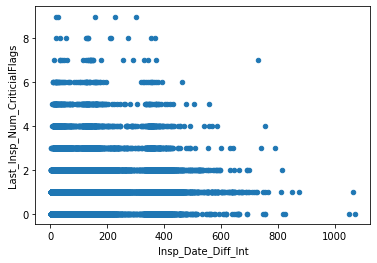

In [39]:
Data_subset.plot("Insp_Date_Diff_Int", "Last_Insp_Num_CriticialFlags", kind="scatter")
plt.show()

In [40]:
from sklearn.linear_model import LinearRegression

X = Data_subset.Insp_Date_Diff_Int.values.reshape(-1, 1)
Y = Data_subset.Last_Insp_Num_CriticialFlags.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, Y)
slopes = model.coef_
intercept = model.intercept_

print(slopes, intercept)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[[-0.00121871]] [1.52516062]


Text(0.5, 0, 'Insp_Date_Diff_Int')

Text(0, 0.5, 'Last Inspection')

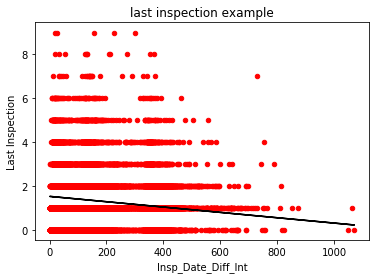

In [41]:
data1 = Data_subset.plot("Insp_Date_Diff_Int", "Last_Insp_Num_CriticialFlags", kind="scatter", title="last inspection example", color="red")
data1.set_xlabel("Insp_Date_Diff_Int")
data1.set_ylabel("Last Inspection")

data1.plot(X, X * slopes[0] + intercept, 'black')

plt.show()

# Combine HD and 311 datasets

In [6]:
ny311 = pd.read_csv('NY311_FoodCalls.csv')
ny311.head()

,createddate,complainttype,descriptor,locationtype,incidentzip,landmark,latitude,longitude,cleaned_date
0,10/1/19 8:56,Rodent,Rat Sighting,Restaurant,11211.0,NORTH 7 STREET,40.717689,-73.957472,10/1/19
1,10/6/19 19:11,Food Poisoning,1 or 2,Food Cart Vendor,10029.0,2 AVENUE,40.785145,-73.946430,10/6/19
2,10/7/19 18:19,Food Poisoning,3 or More,Restaurant,11367.0,MAIN STREET,40.726353,-73.821670,10/7/19
3,10/11/19 16:13,Food Establishment,Food Contaminated,Restaurant/Bar/Deli/Bakery,10002.0,CHRYSTIE STREET,40.717423,-73.994207,10/11/19
4,10/11/19 23:22,Food Establishment,Letter Grading,Restaurant/Bar/Deli/Bakery,10032.0,AUDUBON AVENUE,40.840571,-73.938290,10/11/19


In [28]:
ny311["cleaned_date"] = pd.to_datetime(ny311["cleaned_date"])
ny311['latitude'] = ny311['latitude'].round(6)
ny311['longitude'] = ny311['longitude'].round(6)
ny311['location'] = ny311['latitude'].astype(str) + ', ' + ny311['longitude'].astype(str)
ny311.head()
ny311.describe()
ny311.dtypes

,createddate,complainttype,descriptor,locationtype,incidentzip,landmark,latitude,longitude,cleaned_date,location
0,10/1/19 8:56,Rodent,Rat Sighting,Restaurant,11211.0,NORTH 7 STREET,40.717689,-73.957472,2019-10-01,"40.717689, -73.957472"
1,10/6/19 19:11,Food Poisoning,1 or 2,Food Cart Vendor,10029.0,2 AVENUE,40.785145,-73.946430,2019-10-06,"40.785145, -73.94643"
2,10/7/19 18:19,Food Poisoning,3 or More,Restaurant,11367.0,MAIN STREET,40.726353,-73.821670,2019-10-07,"40.726353, -73.82167"
3,10/11/19 16:13,Food Establishment,Food Contaminated,Restaurant/Bar/Deli/Bakery,10002.0,CHRYSTIE STREET,40.717423,-73.994207,2019-10-11,"40.717423, -73.994207"
4,10/11/19 23:22,Food Establishment,Letter Grading,Restaurant/Bar/Deli/Bakery,10032.0,AUDUBON AVENUE,40.840571,-73.938290,2019-10-11,"40.840571, -73.93829"


,incidentzip,latitude,longitude
count,70370.000000,70080.000000,70080.000000
mean,10667.574890,40.729783,-73.941416
std,765.589604,0.072188,0.076659
min,0.000000,40.505287,-74.251277
25%,10024.000000,40.684587,-73.987890
50%,10466.000000,40.736092,-73.955116
75%,11226.000000,40.767537,-73.900763
max,99999.000000,40.910742,-73.700788


createddate              object
complainttype            object
descriptor               object
locationtype             object
incidentzip             float64
landmark                 object
latitude                float64
longitude               float64
cleaned_date     datetime64[ns]
location                 object
dtype: object

In [29]:
#get count of food-related complaints at each date for each lat/long
ny311_counts = ny311.groupby(["location", 'cleaned_date']).agg({'complainttype': 'count'})
ny311_counts = ny311_counts.reset_index()
len(ny311_counts)
ny311_counts = ny311_counts.sort_values('complainttype')
ny311_counts.head()
ny311_counts.tail()

65920

,location,cleaned_date,complainttype
0,"40.505287, -74.245593",2015-09-05,1
43239,"40.757314, -73.968445",2019-03-05,1
43240,"40.757314, -73.968445",2019-06-05,1
43241,"40.757314, -73.968489",2016-02-15,1
43242,"40.757314, -73.968489",2017-07-21,1


,location,cleaned_date,complainttype
2021,"40.587425, -73.812381",2018-06-20,19
20314,"40.702218, -73.904249",2015-02-22,20
44990,"40.759785, -73.829236",2018-12-05,21
57724,"40.820254, -73.95495",2014-09-29,21
57725,"40.820254, -73.95495",2014-09-30,26


In [27]:
Data['Latitude'] = Data['Latitude'].round(6)
Data['Longitude'] = Data['Longitude'].round(6)
Data['location'] = Data['Latitude'].astype(str) + ', ' + Data['Longitude'].astype(str)
Data.head()

,Unnamed: 0,CAMIS,Second_Last_Insp_Type,Second_Last_Insp_Date,Second_Last_Insp_Num_CriticialFlags,Last_Insp_Type,Last_Insp_Date,Last_Insp_Num_CriticialFlags,Insp_Date_Diff,DBA,...,CUISINE DESCRIPTION,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,location
0,0,30075445,Initial,2019-10-21,2.0,Re-inspection,2019-11-04,1,14 days,MORRIS PARK BAKE SHOP,...,Bakery,40.848231,-73.855972,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37,"40.848231, -73.855972"
1,1,30112340,Initial,2018-03-13,1.0,Initial,2019-03-04,1,356 days,WENDY'S,...,Hamburgers,40.662652,-73.962081,309.0,40.0,32700.0,3029737.0,3.011970e+09,BK60,"40.662652, -73.962081"
2,4,30191841,Initial,2018-05-16,1.0,Initial,2019-06-06,1,386 days,DJ REYNOLDS PUB AND RESTAURANT,...,Irish,40.767326,-73.984310,104.0,3.0,13900.0,1026048.0,1.010480e+09,MN15,"40.767326, -73.98431"
3,6,40356018,Initial,2018-10-30,1.0,Initial,2019-11-08,1,374 days,RIVIERA CATERERS,...,American,40.579920,-73.982090,313.0,47.0,34800.0,3347399.0,3.069970e+09,BK21,"40.57992, -73.98209"
4,9,40356151,Initial,2017-08-19,1.0,Initial,2018-10-06,2,413 days,BRUNOS ON THE BOULEVARD,...,American,40.763971,-73.880973,403.0,22.0,32900.0,4024132.0,4.011000e+09,QN28,"40.763971, -73.880973"


In [39]:
#merge datasets
HD_ny311 = pd.merge(Data, ny311_counts, left_on = ['location'], right_on = ['location'], how = 'left')

In [40]:
len(Data)
len(ny311_counts)
len(HD_ny311)
len(HD_ny311['CAMIS'].unique())
HD_ny311.head()

25697

65920

50597

25697

,Unnamed: 0,CAMIS,Second_Last_Insp_Type,Second_Last_Insp_Date,Second_Last_Insp_Num_CriticialFlags,Last_Insp_Type,Last_Insp_Date,Last_Insp_Num_CriticialFlags,Insp_Date_Diff,DBA,...,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,location,cleaned_date,complainttype
0,0,30075445,Initial,2019-10-21,2.0,Re-inspection,2019-11-04,1,14 days,MORRIS PARK BAKE SHOP,...,-73.855972,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37,"40.848231, -73.855972",NaT,NaN
1,1,30112340,Initial,2018-03-13,1.0,Initial,2019-03-04,1,356 days,WENDY'S,...,-73.962081,309.0,40.0,32700.0,3029737.0,3.011970e+09,BK60,"40.662652, -73.962081",NaT,NaN
2,4,30191841,Initial,2018-05-16,1.0,Initial,2019-06-06,1,386 days,DJ REYNOLDS PUB AND RESTAURANT,...,-73.984310,104.0,3.0,13900.0,1026048.0,1.010480e+09,MN15,"40.767326, -73.98431",NaT,NaN
3,6,40356018,Initial,2018-10-30,1.0,Initial,2019-11-08,1,374 days,RIVIERA CATERERS,...,-73.982090,313.0,47.0,34800.0,3347399.0,3.069970e+09,BK21,"40.57992, -73.98209",NaT,NaN
4,9,40356151,Initial,2017-08-19,1.0,Initial,2018-10-06,2,413 days,BRUNOS ON THE BOULEVARD,...,-73.880973,403.0,22.0,32900.0,4024132.0,4.011000e+09,QN28,"40.763971, -73.880973",NaT,NaN


In [ ]:
HD_ny311.columns
HD_ny311 = HD_ny311.drop(columns = ['Unnamed: 0'])

In [46]:
HD_ny311.columns
HD_ny311.rename(columns={'cleaned_date':'ny311_complaint_date',
                          'complainttype':'ny311_number_of_complaints'}, 
                 inplace=True)
HD_ny311.columns

Index(['CAMIS', 'Second_Last_Insp_Type', 'Second_Last_Insp_Date',
       'Second_Last_Insp_Num_CriticialFlags', 'Last_Insp_Type',
       'Last_Insp_Date', 'Last_Insp_Num_CriticialFlags', 'Insp_Date_Diff',
       'DBA', 'BORO', 'ZIPCODE', 'CUISINE DESCRIPTION', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA', 'location', 'cleaned_date', 'complainttype'],
      dtype='object')

Index(['CAMIS', 'Second_Last_Insp_Type', 'Second_Last_Insp_Date',
       'Second_Last_Insp_Num_CriticialFlags', 'Last_Insp_Type',
       'Last_Insp_Date', 'Last_Insp_Num_CriticialFlags', 'Insp_Date_Diff',
       'DBA', 'BORO', 'ZIPCODE', 'CUISINE DESCRIPTION', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA', 'location', 'ny311_complaint_date',
       'ny311_number_of_complaints'],
      dtype='object')

In [49]:
HD_ny311 = HD_ny311.sort_values('ny311_number_of_complaints', ascending = False)
HD_ny311.head()

,CAMIS,Second_Last_Insp_Type,Second_Last_Insp_Date,Second_Last_Insp_Num_CriticialFlags,Last_Insp_Type,Last_Insp_Date,Last_Insp_Num_CriticialFlags,Insp_Date_Diff,DBA,BORO,...,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,location,ny311_complaint_date,ny311_number_of_complaints
49858,50096475,NaN,NaT,NaN,Initial,2019-08-29,1,NaT,HUNGRY GHOST 2,Manhattan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"nan, nan",2019-07-17,11.0
41067,50088054,Initial,2019-10-22,2.0,Re-inspection,2019-11-13,1,22 days,BUBBLEOLOGY,Manhattan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"nan, nan",2019-07-17,11.0
17610,50005134,Initial,2018-04-05,2.0,Initial,2019-06-13,1,434 days,KINFOLK,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"nan, nan",2019-07-17,11.0
49327,50096211,Initial,2019-09-19,1.0,Re-inspection,2019-10-25,3,36 days,COCO MOKA CAFE,Manhattan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"nan, nan",2019-07-17,11.0
23749,50037907,Initial,2018-03-07,1.0,Initial,2019-03-11,1,369 days,BARRILES RESTAURANT AND SPORTS BAR,Queens,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"nan, nan",2019-07-17,11.0


In [50]:
Data['Latitude'].isnull().sum(axis = 0)

50

In [51]:
HD_ny311.dtypes

CAMIS                                            int64
Second_Last_Insp_Type                           object
Second_Last_Insp_Date                   datetime64[ns]
Second_Last_Insp_Num_CriticialFlags            float64
Last_Insp_Type                                  object
Last_Insp_Date                          datetime64[ns]
Last_Insp_Num_CriticialFlags                     int64
Insp_Date_Diff                         timedelta64[ns]
DBA                                             object
BORO                                            object
ZIPCODE                                        float64
CUISINE DESCRIPTION                             object
Latitude                                       float64
Longitude                                      float64
Community Board                                float64
Council District                               float64
Census Tract                                   float64
BIN                                            float64
BBL       